In [2]:
%reset -f

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Text(0, 0.5, 'Number of Days')

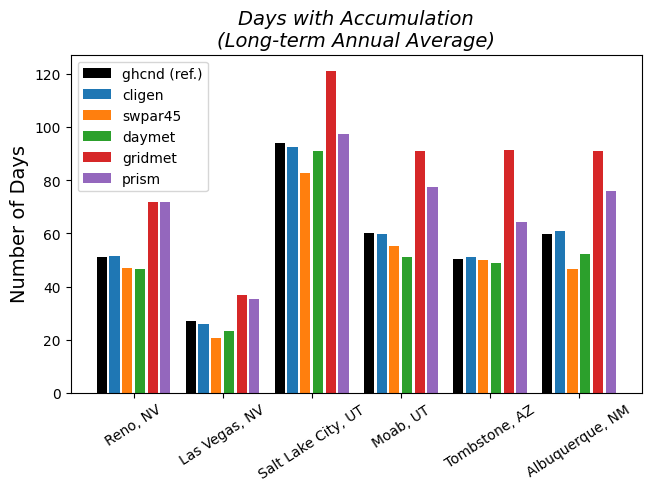

In [ ]:

import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
from decimal import Decimal

dataDIR = '/content/drive/My Drive/Colab Notebooks/GHCNd'


lvlOneFolders = ['rn', 'lv', 'sl', 'mb', 'tb', 'ab']
labels = ['Reno, NV', 'Las Vegas, NV', 'Salt Lake City, UT', 'Moab, UT', 'Tombstone, AZ', 'Albuquerque, NM']

fig, ax = plt.subplots(layout='constrained')
plt.rcParams['axes.grid'] = True

#ghcnd, cligen, daymet, gridmet,
data_years = [40, 40, 40, 34, 35, 33]

j = 0
for i in range(len(labels)):

  lvlOneFolder = lvlOneFolders[i]

  files = os.listdir(os.path.join(dataDIR, lvlOneFolder))

  for f in files:
    if '_ghcnd.csv' in f:
      ghcnd_file = f
    elif '_swpar45.txt' in f:
      swpar45_file = f
    elif '_cligen.csv' in f:
      cligen_file = f
    elif '_daymet.csv' in f:
      daymet_file = f
    elif '_gridmet.csv' in f:
      gridmet_file = f
    elif '_prism.csv' in f:
      prism_file = f
    else:
      pass

  with open(os.path.join(dataDIR, lvlOneFolder, ghcnd_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[4]) for l in lines[1:] if float(l.split(',')[4]) > 0.0]
    ghcnd_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, cligen_file)) as f:
    lines = f.readlines()
    p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
    cligen_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, swpar45_file)) as f:
    lines = f.readlines()
    p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
    swpar45_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, daymet_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    daymet_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, gridmet_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    gridmet_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, prism_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    prism_p = p

  color = ['#000000', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
  ax.bar([j+1+(i*6), j+2+(i*6), j+3+(i*6), j+4+(i*6), j+5+(i*6), j+6+(i*6)], [len(ghcnd_p)/data_years[0], len(cligen_p)/data_years[1], len(swpar45_p)/data_years[2], len(daymet_p)/data_years[3], len(gridmet_p)/data_years[4], len(prism_p)/data_years[5]], color=color)

  j += 1

  ax.set_xticks([3, 9, 15, 21, 27, 33])
  ax.set_xticklabels(labels, rotation=33, ha='center')
  ax.grid(False)
  ax.set_ylabel('Days with Accumulation\n(Long-term Annual Average)')



ghcnd, = ax.bar([0], [0], width=0, color=color[0])
cligen, = ax.bar([0], [0], width=0, color=color[1])
swpar45, = ax.bar([0], [0], width=0, color=color[2])
daymet, = ax.bar([0], [0], width=0, color=color[3])
gridmet, = ax.bar([0], [0], width=0, color=color[4])
prism, = ax.bar([0], [0], width=0, color=color[5])
legend_labels = ['ghcnd (ref.)', 'cligen', 'swpar45', 'daymet', 'gridmet', 'prism']
ax.legend(handles=[ghcnd, cligen, swpar45, daymet, gridmet, prism], labels=legend_labels)
ax.set_xticks([3.5, 10.5, 17.5, 24.5, 31.5, 38.5])
ax.set_xticklabels(labels, rotation=33, ha='center')
ax.grid(False)
ax.set_title('Days with Accumulation\n(Long-term Annual Average)', size=14, fontstyle='oblique')
ax.set_ylabel('Number of Days', size=14, fontstyle='normal')





Text(0, 0.5, 'Accumulation\n(mm)')

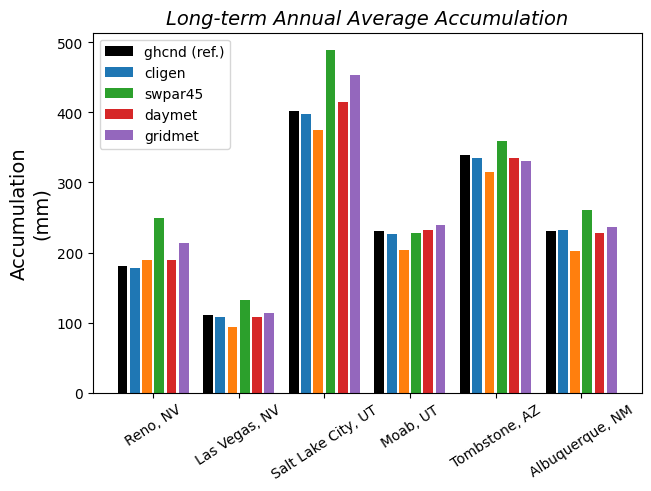

In [ ]:

import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
from decimal import Decimal

dataDIR = '/content/drive/My Drive/Colab Notebooks/GHCNd'

lvlOneFolders = ['rn', 'lv', 'sl', 'mb', 'tb', 'ab']
labels = ['Reno, NV', 'Las Vegas, NV', 'Salt Lake City, UT', 'Moab, UT', 'Tombstone, AZ', 'Albuquerque, NM']

fig, ax = plt.subplots(layout='constrained')
plt.rcParams['axes.grid'] = True

#ghcnd, cligen, daymet, gridmet,
data_years = [40, 40, 40, 34, 35, 33]

j = 0
for i in range(len(labels)):

  lvlOneFolder = lvlOneFolders[i]

  files = os.listdir(os.path.join(dataDIR, lvlOneFolder))

  for f in files:
    if '_ghcnd.csv' in f:
      ghcnd_file = f
    elif '_cligen.csv' in f:
      cligen_file = f
    elif '_swpar45.txt' in f:
      swpar45_file = f
    elif '_daymet.csv' in f:
      daymet_file = f
    elif '_gridmet.csv' in f:
      gridmet_file = f
    elif '_prism.csv' in f:
      prism_file = f
    else:
      pass

  with open(os.path.join(dataDIR, lvlOneFolder, ghcnd_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[4]) for l in lines[1:] if float(l.split(',')[4]) > 0.0]
    ghcnd_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, cligen_file)) as f:
    lines = f.readlines()
    p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
    cligen_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, swpar45_file)) as f:
    lines = f.readlines()
    p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
    swpar45_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, daymet_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    daymet_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, gridmet_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    gridmet_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, prism_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    prism_p = p

  color = ['#000000', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
  ax.bar([j+1+(i*6), j+2+(i*6), j+3+(i*6), j+4+(i*6), j+5+(i*6), j+6+(i*6)], [sum(ghcnd_p)/data_years[0], sum(cligen_p)/data_years[1], sum(swpar45_p)/data_years[2], sum(daymet_p)/data_years[3], sum(gridmet_p)/data_years[4], sum(prism_p)/data_years[5]], color=color)

  j += 1


ghcnd, = ax.bar([0], [0], width=0, color=color[0])
cligen, = ax.bar([0], [0], width=0, color=color[1])
swpar45, = ax.bar([0], [0], width=0, color=color[2])
daymet, = ax.bar([0], [0], width=0, color=color[3])
gridmet, = ax.bar([0], [0], width=0, color=color[4])
prism, = ax.bar([0], [0], width=0, color=color[5])
legend_labels = ['ghcnd (ref.)', 'cligen', 'swpar45', 'daymet', 'gridmet', 'prism']
ax.legend(handles=[ghcnd, cligen, daymet, gridmet, prism], labels=legend_labels)
ax.set_xticks([3.5, 10.5, 17.5, 24.5, 31.5, 38.5])
ax.set_xticklabels(labels, rotation=33, ha='center')
ax.grid(False)
ax.set_title('Long-term Annual Average Accumulation', size=14, fontstyle='oblique')
ax.set_ylabel('Accumulation\n(mm)', size=14, fontstyle='normal')





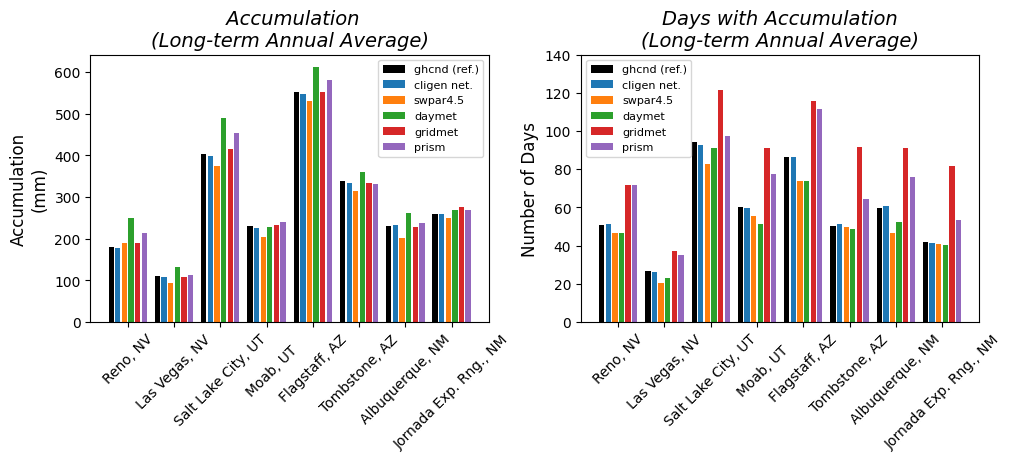

In [4]:

import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
from decimal import Decimal

dataDIR = '/content/drive/My Drive/Colab Notebooks/GHCNd'
saveFILE = '/content/drive/My Drive/GEE_Downloads/Fig_AnnualP_WetD.jpg'

lvlOneFolders = ['rn', 'lv', 'sl', 'mb', 'fs', 'tb', 'ab', 'jd']
labels = ['Reno, NV', 'Las Vegas, NV', 'Salt Lake City, UT', '\nMoab, UT', 'Flagstaff, AZ', 'Tombstone, AZ', 'Albuquerque, NM', 'Jornada Exp. Rng., NM']

fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(10, 4.5))
plt.rcParams['axes.grid'] = True

data_years = [40, 40, 40, 34, 35, 33]

for ax_i in range(2):
  j = 0
  for i in range(len(labels)):

    lvlOneFolder = lvlOneFolders[i]

    files = os.listdir(os.path.join(dataDIR, lvlOneFolder))

    for f in files:
      if '_ghcnd.csv' in f:
        ghcnd_file = f
      elif '_cligen.csv' in f:
        cligen_file = f
      elif '_swpar45.txt' in f:
        swpar45_file = f
      elif '_daymet.csv' in f:
        daymet_file = f
      elif '_gridmet.csv' in f:
        gridmet_file = f
      elif '_prism.csv' in f:
        prism_file = f
      else:
        pass

    with open(os.path.join(dataDIR, lvlOneFolder, ghcnd_file)) as f:
      lines = f.readlines()
      p = [float(l.split(',')[4]) for l in lines[1:] if float(l.split(',')[4]) > 0.0]
      ghcnd_p = p

    with open(os.path.join(dataDIR, lvlOneFolder, cligen_file)) as f:
      lines = f.readlines()
      p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
      cligen_p = p

    with open(os.path.join(dataDIR, lvlOneFolder, swpar45_file)) as f:
      lines = f.readlines()
      p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
      swpar45_p = p

    with open(os.path.join(dataDIR, lvlOneFolder, daymet_file)) as f:
      lines = f.readlines()
      p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
      daymet_p = p

    with open(os.path.join(dataDIR, lvlOneFolder, gridmet_file)) as f:
      lines = f.readlines()
      p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
      gridmet_p = p

    with open(os.path.join(dataDIR, lvlOneFolder, prism_file)) as f:
      lines = f.readlines()
      p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
      prism_p = p

    color = ['#000000', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    if ax_i == 0:
      ax[0].bar([j+1+(i*6), j+2+(i*6), j+3+(i*6), j+4+(i*6), j+5+(i*6), j+6+(i*6)], [sum(ghcnd_p)/data_years[0], sum(cligen_p)/data_years[1], sum(swpar45_p)/data_years[2], sum(daymet_p)/data_years[3], sum(gridmet_p)/data_years[4], sum(prism_p)/data_years[5]], color=color)
      ax[0].set_xticks([3.5, 10.5, 17.5, 24.5, 31.5, 38.5, 45.5, 52.5])
      ax[0].set_xticklabels(labels, rotation=45, ha='center')
      ax[0].grid(False)
      ax[0].set_title(' Accumulation\n(Long-term Annual Average)', size=14, fontstyle='oblique')
      ax[0].set_ylabel('Accumulation\n(mm)', size=12, fontstyle='normal')

    else:
      ax[1].bar([j+1+(i*6), j+2+(i*6), j+3+(i*6), j+4+(i*6), j+5+(i*6), j+6+(i*6)], [len(ghcnd_p)/data_years[0], len(cligen_p)/data_years[1], len(swpar45_p)/data_years[2], len(daymet_p)/data_years[3], len(gridmet_p)/data_years[4], len(prism_p)/data_years[5]], color=color)
      ax[1].set_xticks([3.5, 10.5, 17.5, 24.5, 31.5, 38.5, 45.5, 52.5])
      ax[1].set_xticklabels(labels, rotation=45, ha='center')
      ax[1].grid(False)
      ax[1].set_title('Days with Accumulation\n(Long-term Annual Average)', size=14, fontstyle='oblique')
      ax[1].set_ylim(0, 140)
      ax[1].set_ylabel('Number of Days', size=12, fontstyle='normal')

    j += 1

  ghcnd, = ax[ax_i].bar([0], [0], width=0, color=color[0])
  cligen, = ax[ax_i].bar([0], [0], width=0, color=color[1])
  swpar45, = ax[ax_i].bar([0], [0], width=0, color=color[2])
  daymet, = ax[ax_i].bar([0], [0], width=0, color=color[3])
  gridmet, = ax[ax_i].bar([0], [0], width=0, color=color[4])
  prism, = ax[ax_i].bar([0], [0], width=0, color=color[5])
  legend_labels = ['ghcnd (ref.)', 'cligen net.', 'swpar4.5', 'daymet', 'gridmet', 'prism']
  if ax_i == 0:
    ax[ax_i].legend(handles=[ghcnd, cligen, swpar45, daymet, gridmet, prism], labels=legend_labels, fontsize=8, loc='upper right')
  else:
    ax[ax_i].legend(handles=[ghcnd, cligen, swpar45, daymet, gridmet, prism], labels=legend_labels, fontsize=8, loc='upper left')


fig.savefig(saveFILE, dpi=600, bbox_inches='tight')




In [5]:
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
from decimal import Decimal

dataDIR = '/content/drive/My Drive/Colab Notebooks/GHCNd'

lvlOneFolders = ['rn', 'lv', 'sl', 'mb', 'fs', 'tb', 'ab', 'jd']
labels = ['Reno, NV', 'Las Vegas, NV', 'Salt Lake City, UT', '\nMoab, UT', 'Flagstaff, AZ', 'Tombstone, AZ', 'Albuquerque, NM', 'Jornada Exp. Rng., NM']

data_years = [40, 40, 40, 34, 35, 33]

def abs_per_error(grnd, grid):
  ape = (abs(grnd - grid)/grnd)*100.0
  return ape

accum_ape, ndays_ape = [], []
for i in range(len(labels)):

  lvlOneFolder = lvlOneFolders[i]

  files = os.listdir(os.path.join(dataDIR, lvlOneFolder))

  for f in files:
    if '_ghcnd.csv' in f:
      ghcnd_file = f
    elif '_cligen.csv' in f:
      cligen_file = f
    elif '_swpar45.txt' in f:
      swpar45_file = f
    elif '_daymet.csv' in f:
      daymet_file = f
    elif '_gridmet.csv' in f:
      gridmet_file = f
    elif '_prism.csv' in f:
      prism_file = f
    else:
      pass

  with open(os.path.join(dataDIR, lvlOneFolder, ghcnd_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[4]) for l in lines[1:] if float(l.split(',')[4]) > 0.0]
    ghcnd_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, cligen_file)) as f:
    lines = f.readlines()
    p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
    cligen_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, swpar45_file)) as f:
    lines = f.readlines()
    p = [float(l.split()[3]) for l in lines[15:-1] if float(l.split()[3]) > 0.0]
    swpar45_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, daymet_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    daymet_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, gridmet_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    gridmet_p = p

  with open(os.path.join(dataDIR, lvlOneFolder, prism_file)) as f:
    lines = f.readlines()
    p = [float(l.split(',')[1]) for l in lines[1:] if float(l.split(',')[1]) > 0.0]
    prism_p = p


  accum_errors, ndays_errors = [], []
  accum = [sum(ghcnd_p)/data_years[0], sum(cligen_p)/data_years[1], sum(swpar45_p)/data_years[2], sum(daymet_p)/data_years[3], sum(gridmet_p)/data_years[4], sum(prism_p)/data_years[5]]
  ndays = [len(ghcnd_p)/data_years[0], len(cligen_p)/data_years[1], len(swpar45_p)/data_years[2], len(daymet_p)/data_years[3], len(gridmet_p)/data_years[4], len(prism_p)/data_years[5]]

  for a in accum[1:]:
    accum_errors.append(abs_per_error(accum[0], a))

  for n in ndays[1:]:
    ndays_errors.append(abs_per_error(ndays[0], n))

  accum_ape.append(accum_errors)
  ndays_ape.append(ndays_errors)

dataset_accum_apes, dataset_ndays_apes = [], []
for i in range(5):
  s_a = 0
  s_n = 0
  for j, label in enumerate(labels):
    s_a += accum_ape[j][i]
    s_n += ndays_ape[j][i]
  dataset_accum_apes.append(s_a/len(labels))
  dataset_ndays_apes.append(s_n/len(labels))

print('accum_apes')
print('cligen swpar45 daymet gridmet prism')
print(dataset_accum_apes)
print('ndays_apes')
print('cligen swpar45 daymet gridmet prism')
print(dataset_ndays_apes)


accum_apes
cligen swpar45 daymet gridmet prism
[1.3344653839722953, 8.26280610436774, 14.221698420882602, 2.5978509672868535, 6.283525394895591]
ndays_apes
cligen swpar45 daymet gridmet prism
[1.3789281592222362, 11.409251290406834, 9.439185385931884, 52.68935395406284, 26.94247162003097]
